# Decision Trees

Decision Trees in Machine Learning can be used as:
- classification
- regression

They are one of the more intuitive models in Machine Learning.

To understand how a decision tree works, let's look at the following example

## Iris Data Set
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. ([More on this](http://archive.ics.uci.edu/ml/datasets/Iris))

Predicted attribute: class of iris plant. 

In [43]:
import tools.extract as ex

iris_data = ex.load_file("data/iris/data.csv")
iris_data[:5]

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Attribute Selection**: For now, let's look at 
- **sepal-length** 
- **sepal-width**

In [44]:
data = iris_data[['sepal-length','sepal-width','class']]
data_se = data[data['class'] == "Iris-setosa"]
data_ve = data[data['class'] == "Iris-versicolor"]
data_vi = data[data['class'] == "Iris-virginica"]

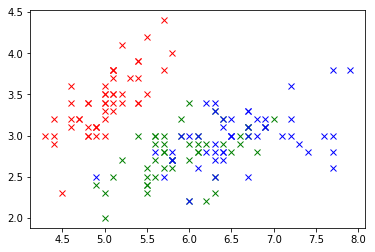

In [45]:
import matplotlib.pyplot as plt 
x = range(1,10) 
y = range(1,10) 
plt.plot(data_se['sepal-length'],data_se['sepal-width'],'rx')
plt.plot(data_ve['sepal-length'],data_ve['sepal-width'],'gx')
plt.plot(data_vi['sepal-length'],data_vi['sepal-width'],'bx')
plt.show()

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
X = iris_data[['sepal-length', 'sepal-width']]
Y = iris_data[['class']]
clf = clf.fit(X, Y)

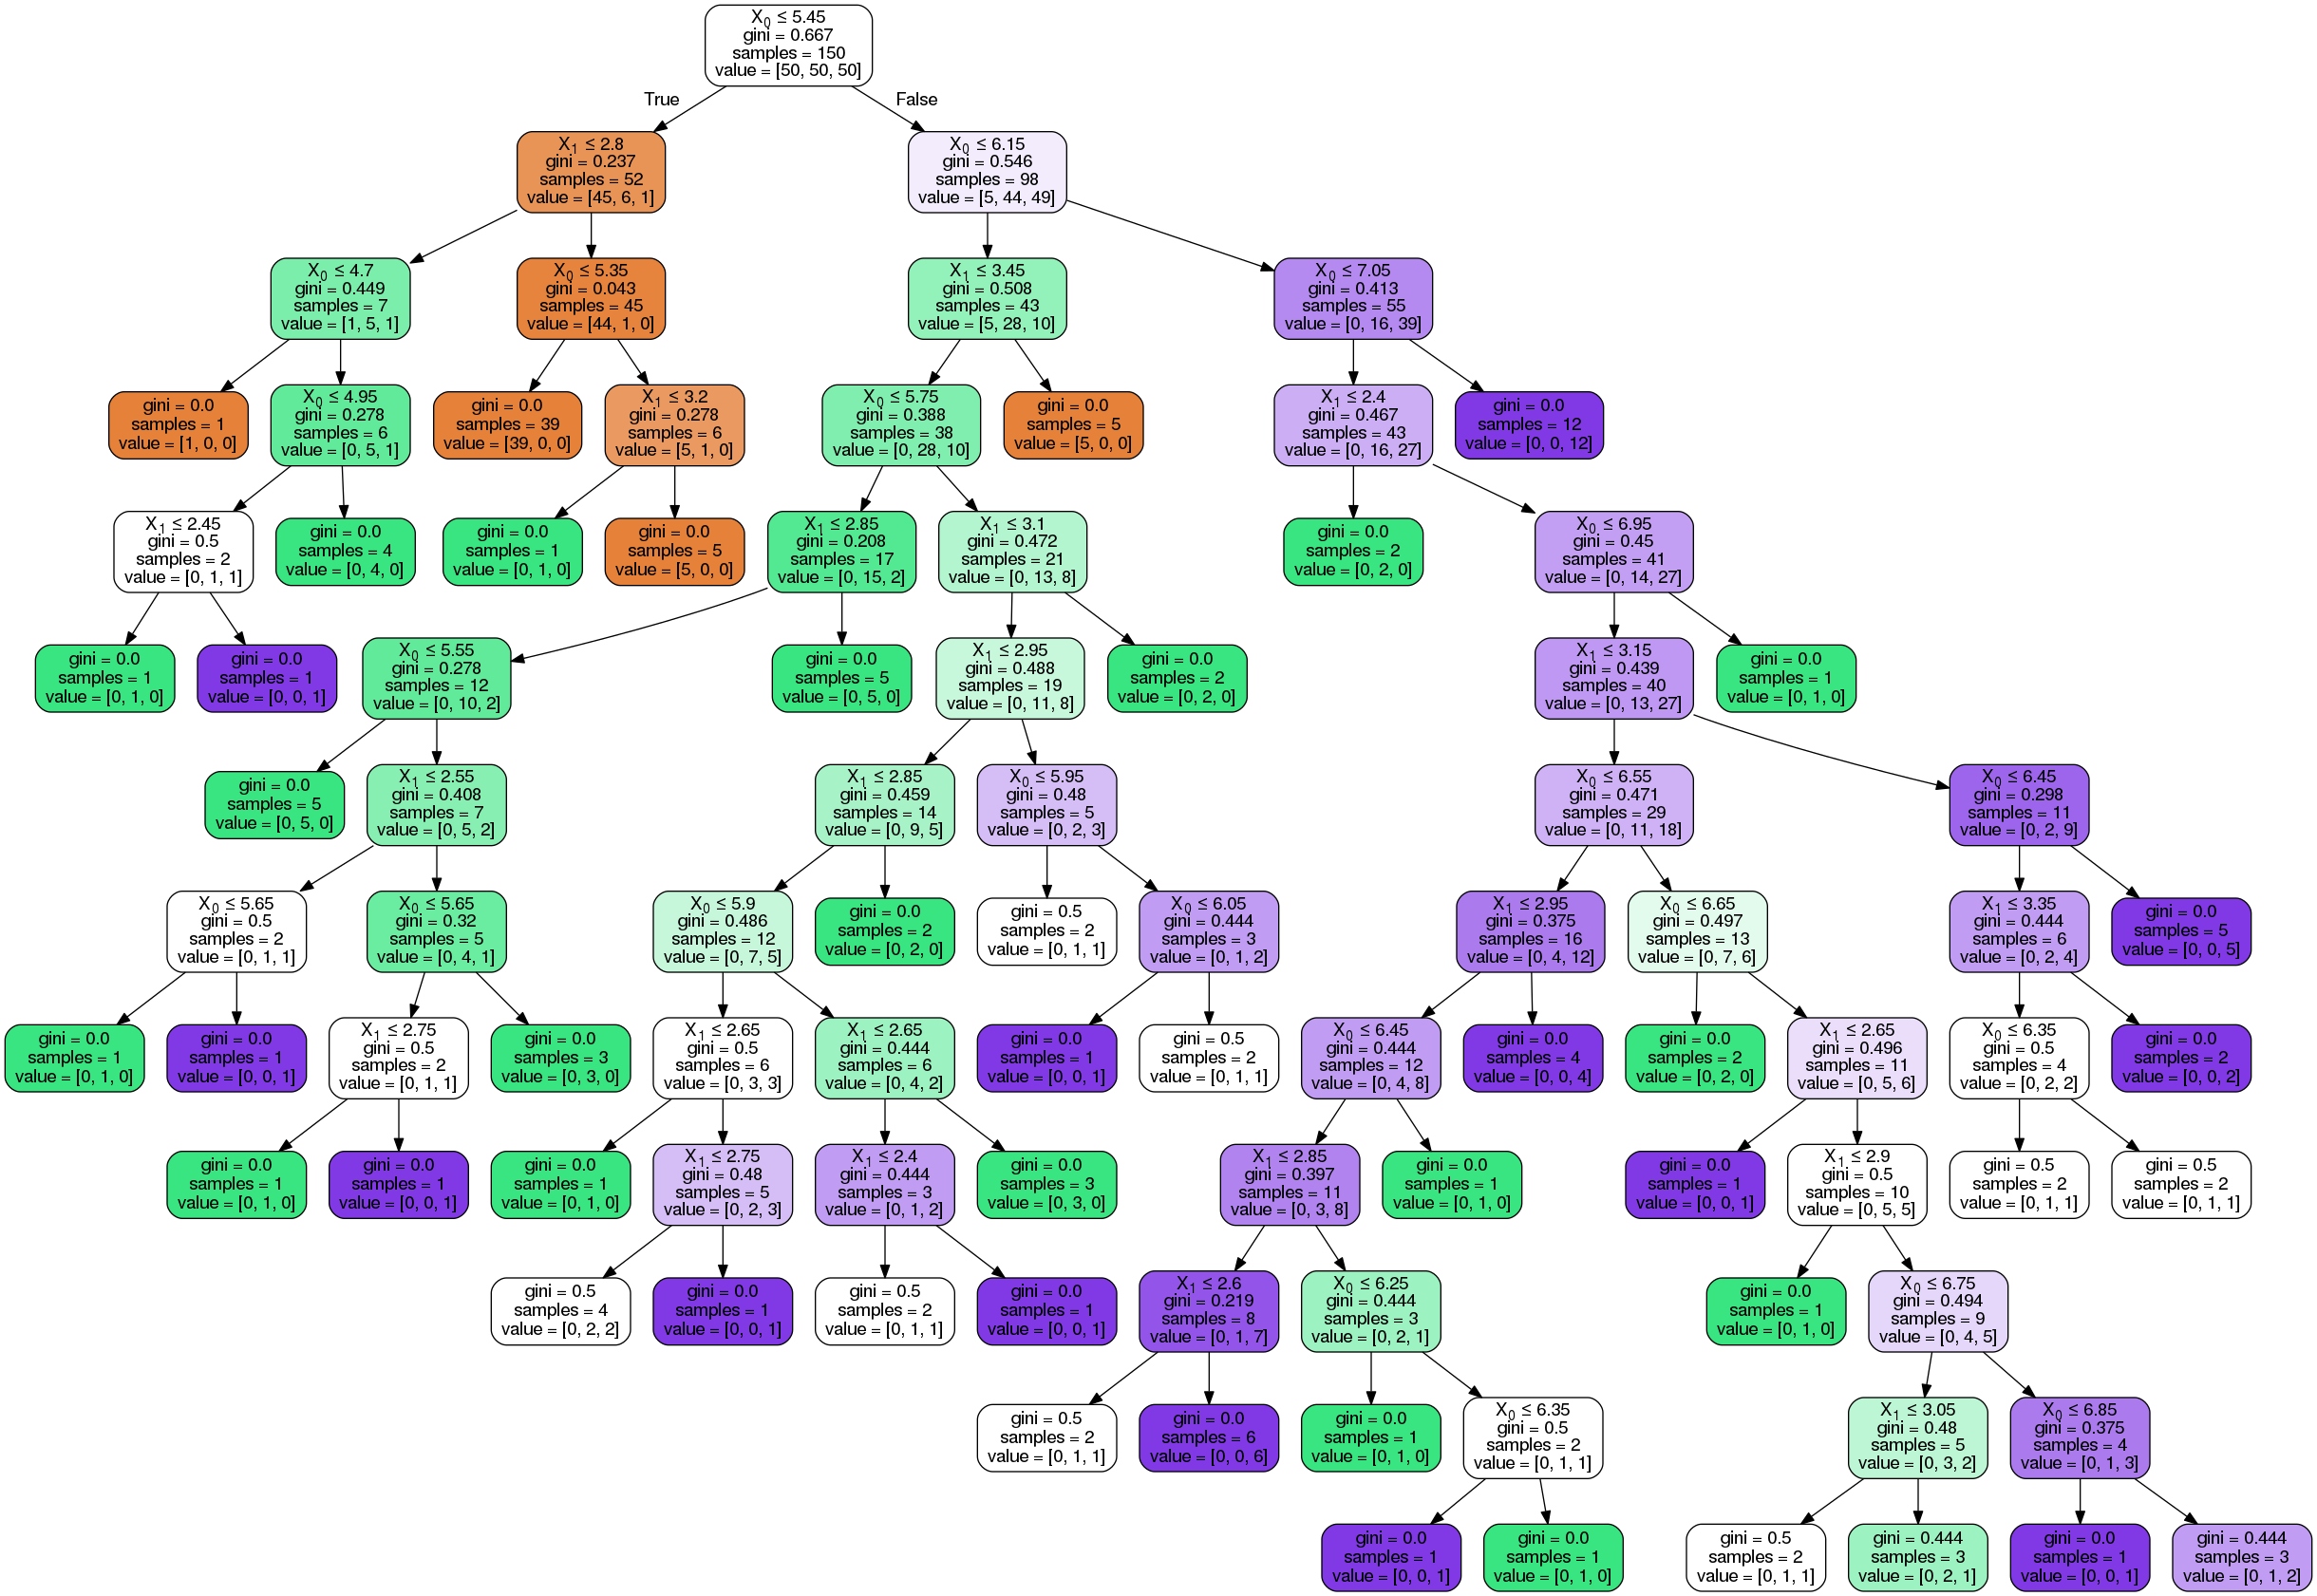

In [47]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Decision Surface

In [48]:
import numpy as np
x1,x2 = np.mgrid[4:8:0.01, 2:4.5:0.01]

xy = np.vstack((x1.flatten(), x2.flatten())).T

In [49]:
surface_class = clf.predict(xy)

surface_se = xy[surface_class == "Iris-setosa"]
surface_ve = xy[surface_class == "Iris-versicolor"]
surface_vi = xy[surface_class == "Iris-virginica"]

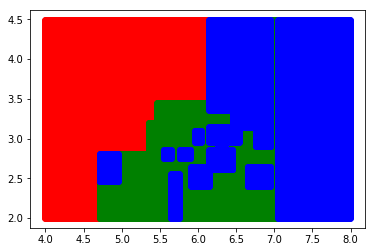

In [50]:
import matplotlib.pyplot as plt 
plt.plot(surface_se[:,0],surface_se[:,1],'ro')
plt.plot(surface_ve[:,0],surface_ve[:,1],'go')
plt.plot(surface_vi[:,0],surface_vi[:,1],'bo')
plt.show()

In [55]:
def plot_steps(max_step):
    
    X = iris_data[['sepal-length', 'sepal-width']]
    Y = iris_data[['class']]
    
    for i in range(1, max_step):
    
        clf = tree.DecisionTreeClassifier(max_depth=i)
        clf = clf.fit(X, Y) 
        
        surface_class = clf.predict(xy)

        surface_se = xy[surface_class == "Iris-setosa"]
        surface_ve = xy[surface_class == "Iris-versicolor"]
        surface_vi = xy[surface_class == "Iris-virginica"]
        
        plt.plot(surface_se[:,0],surface_se[:,1],'ro')
        plt.plot(surface_ve[:,0],surface_ve[:,1],'go')
        plt.plot(surface_vi[:,0],surface_vi[:,1],'bo')
        
        plt.plot(data_se['sepal-length'],data_se['sepal-width'],'rx')
        plt.plot(data_ve['sepal-length'],data_ve['sepal-width'],'gx')
        plt.plot(data_vi['sepal-length'],data_vi['sepal-width'],'bx')
        plt.show()

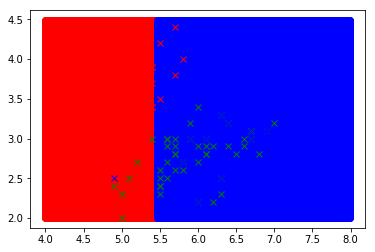

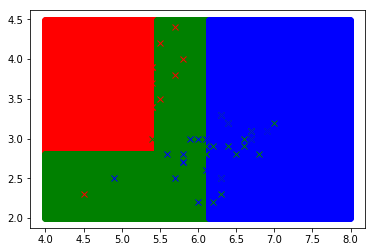

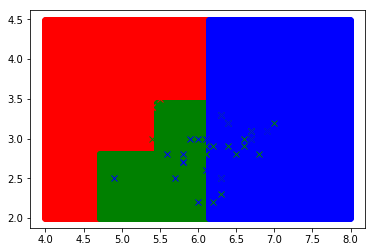

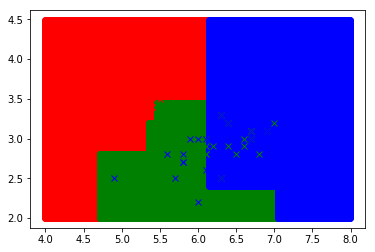

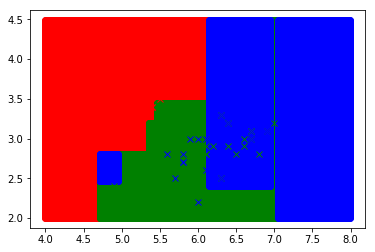

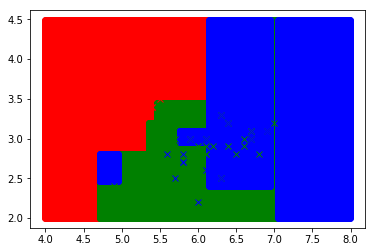

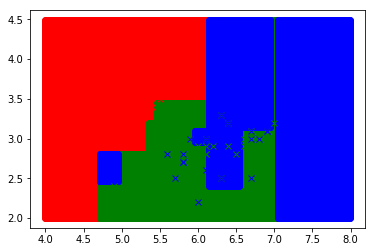

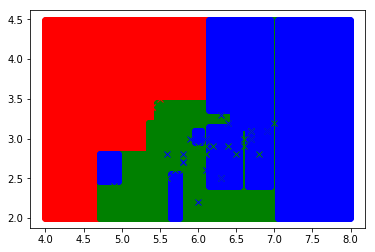

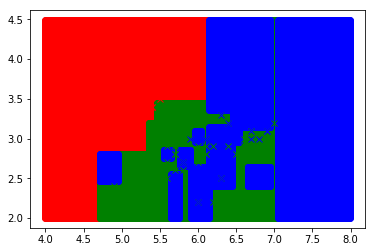

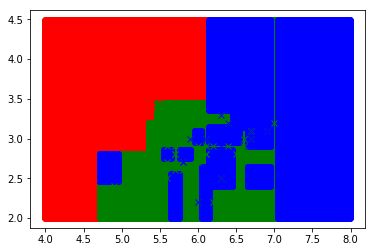

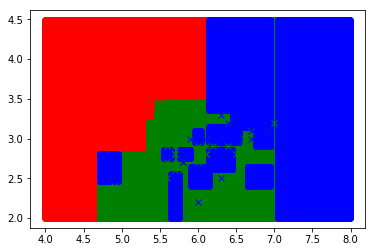

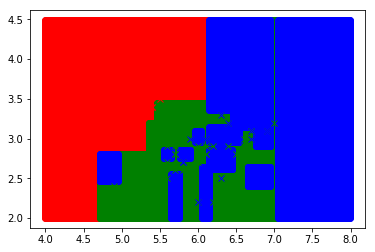

In [58]:
plot_steps(13)

## Adult Data Set
**Abstract:** Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [59]:
import tools.extract as ex

train, val, test = ex.load("adult")
train[:3]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3890,49,Private,165468,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,55,United-States,>50K
6109,18,Private,128086,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,18,United-States,<=50K
24853,54,Private,94055,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


**Attribute Selection**: For now, let's look at 
- **age** 
- **hours-per-week**

In [60]:
attr = ['education-num','hours-per-week', 'class']

data = val[attr]
data_o50 = data[data[attr[-1]] == ">50K"]
data_u50 = data[data[attr[-1]] == "<=50K"]

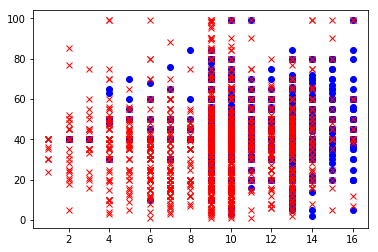

In [67]:
import matplotlib.pyplot as plt 
x = range(1,10) 
y = range(1,10) 
plt.plot(data_o50[attr[0]],data_o50[attr[1]],'bo')
plt.plot(data_u50[attr[0]],data_u50[attr[1]],'rx')
plt.show()

In [62]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
X = data[['education-num', 'hours-per-week']]
Y = data[['class']]
clf = clf.fit(X, Y)

In [65]:
import numpy as np
x1,x2 = np.mgrid[0:16:0.2, 0:100:2]

xy = np.vstack((x1.flatten(), x2.flatten())).T

surface_class = clf.predict(xy)

surface_o = xy[surface_class == ">50K"]
surface_u = xy[surface_class == "<=50K"]

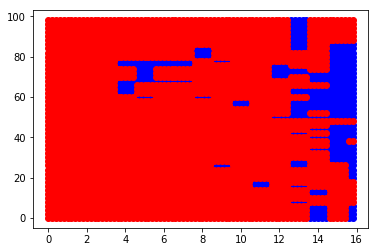

In [66]:
import matplotlib.pyplot as plt 
x = range(1,10) 
y = range(1,10) 
plt.plot(surface_o[:,0],surface_o[:,1],'bo')
plt.plot(surface_u[:,0],surface_u[:,1],'ro')
plt.show()